In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = r'C:\Users\VICTUS\Downloads\titanic_ dataset_final.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


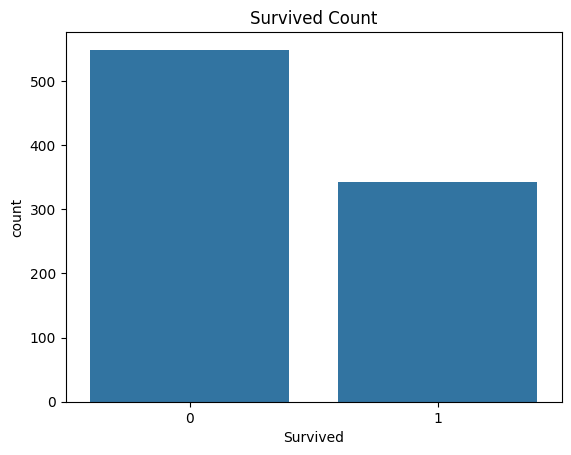

In [11]:
#Survival Rate visualization
sns.countplot(x='Survived',data=df)
plt.title('Survived Count')
plt.show()

In [12]:
pip install ollama

Note: you may need to restart the kernel to use updated packages.


In [14]:
import ollama

def generate_insights(df_summary):
    prompt = f'Analyze the dataset summary and provide insights:\n\n{df_summary}'
    response = ollama.chat(model='mistral',messages=[{'role':'user','content':prompt}])
    return response['message']['content']

#Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print('\n  AI-Generated Insights:\n',insights)


  AI-Generated Insights:
  The dataset provided appears to be a summary statistics of the Titanic passenger data, which includes information about the passengers on the Titanic. Here are some insights from the data:

1. Total number of unique passengers: 891
2. Mean Survived: 0.383838 - This suggests that slightly less than half of the passengers survived.
3. Mean Pclass: 2.308642 - This indicates that most passengers were from Third Class (Pclass 3).
4. Mean Age: 29.699118 - The average age of the passengers was relatively young.
5. Mean SibSp (Number of siblings or spouses aboard): 0.523008 - This suggests that most passengers had less than one sibling or spouse on board.
6. Mean Parch (Number of parents or children aboard): 0.381594 - This indicates that most passengers had less than one parent or child on board.
7. Mean Fare: 32.204208 - The average fare was moderate, which could be due to the mix of passenger classes.
8. Standard deviation for all features (count, mean, std, min,

In [15]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch() 

c:\Users\VICTUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [16]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis,inputs='file',outputs='text',title='AI-Powered EDA with Mistral')

# Lunch App
demo.launch() 

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
